In [2]:
import numpy as np
import matplotlib.pyplot as plt
from brian2 import *
%matplotlib inline
plt.viridis()
import os

In [3]:
ff_w = []
lat_w = []
spikes = {}
state = []
ff_conn = []
lat_conn = []
final_s = []
duration = 0 * second

In [4]:
seed = 7
np.random.seed(seed)
recording_filename_location = "../../synaptogenesis/"
recording_filename = str(np.random.randint(100000, 1000000))


if os.path.isfile(recording_filename_location + recording_filename + ".npz"):
    with np.load(recording_filename_location + recording_filename + ".npz")as init_data:
        print init_data.keys()
        init_ff_w = init_data['ff_w']
        init_lat_w = init_data['lat_w']
        init_ff_conn = init_data['ff_conn']
        init_lat_conn = init_data['lat_conn']
        init_s =  init_data['s']

['lat_w', 'lat_conn', 's', 'ff_w', 'ff_conn']


In [5]:
seed = 7
np.random.seed(seed)
recording_filename_location = "../../synaptogenesis/"
recording_filename = str(np.random.randint(100000, 1000000))


if os.path.isfile(recording_filename_location + recording_filename + ".npz"):
    with np.load(recording_filename_location + "save-" + recording_filename + ".npz")as init_data:
        print init_data.keys()
        ff_w = init_data['ff_w']
        lat_w = init_data['lat_w']
        spikes = init_data['spikes']
        state = init_data['state']
        ff_conn =  init_data['ff_conn']
        lat_conn = init_data['lat_conn']
        final_s = init_data['final_s'].astype(np.int32)
        duration = init_data['duration'] * second
print duration

['spikes', 'lat_w', 'simulator', 'lat_conn', 'final_s', 'state', 'rates', 'duration', 'ff_w', 'ff_conn']
200. ms


In [6]:
recording_filename

'685903'

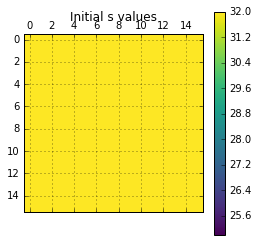

In [7]:
plt.matshow(init_s.reshape(16,16), vmin=25, vmax=32)
plt.grid(visible=True)
plt.title('Initial s values')
plt.colorbar()

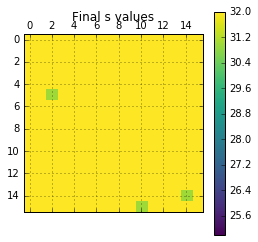

In [8]:
plt.matshow(final_s.reshape(16,16), vmin=25, vmax=32)
plt.grid(visible=True)
plt.title('Final s values')
plt.colorbar()

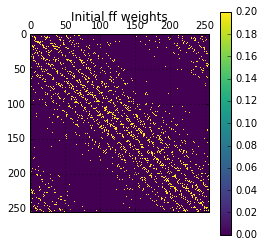

In [9]:
plt.matshow(init_ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial ff weights')
plt.colorbar()

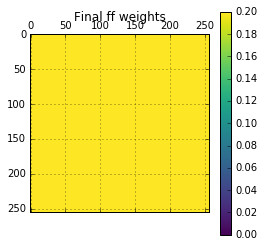

In [10]:
plt.matshow(ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Final ff weights')
plt.colorbar()

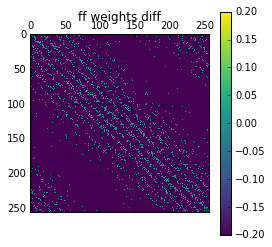

In [11]:
plt.matshow(init_ff_w.reshape(16**2,16**2) - ff_w.reshape(16**2,16**2), vmin=-.2, vmax=.2)
plt.grid(visible=True)
plt.title('ff weights diff')
plt.colorbar()

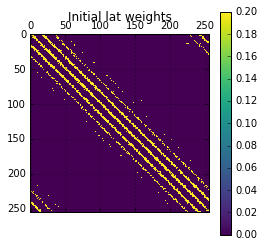

In [12]:
plt.matshow(init_lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial lat weights')
plt.colorbar()

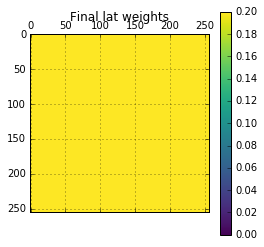

In [13]:
plt.matshow(lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Final lat weights')
plt.colorbar()

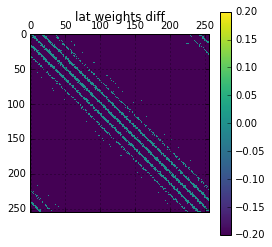

In [14]:
plt.matshow(init_lat_w.reshape(16**2,16**2)-lat_w.reshape(16**2,16**2), vmin=-.2, vmax=.2)
plt.grid(visible=True)
plt.title('lat weights diff')
plt.colorbar()

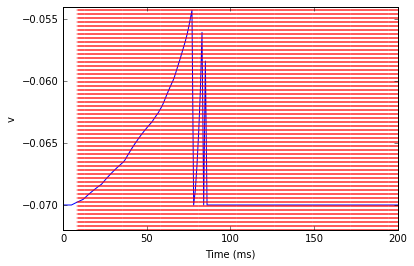

In [15]:
plt.plot(state[0])
plt.xlim(0, duration / ms)
for t in spikes.ravel()[0][0]:
    plt.axvline(t/ms, ls=':', c='r', lw=1, alpha=.3)
plt.xlabel('Time (ms)')
plt.ylabel('v')

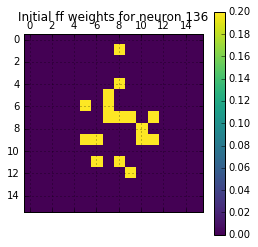

In [16]:
plt.matshow(np.asarray(init_ff_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial ff weights for neuron 136')
plt.colorbar()

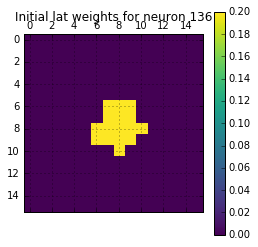

In [17]:
plt.matshow(np.asarray(init_lat_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
plt.grid(visible=True)
plt.title('Initial lat weights for neuron 136')
plt.colorbar()

In [18]:
150 // 16

9

In [19]:
150 % 16

6

In [20]:
8 * 16 + 16

144

In [21]:
128 // 16

8

In [22]:
128 % 16

0

In [23]:
8 * 16 + 8

136

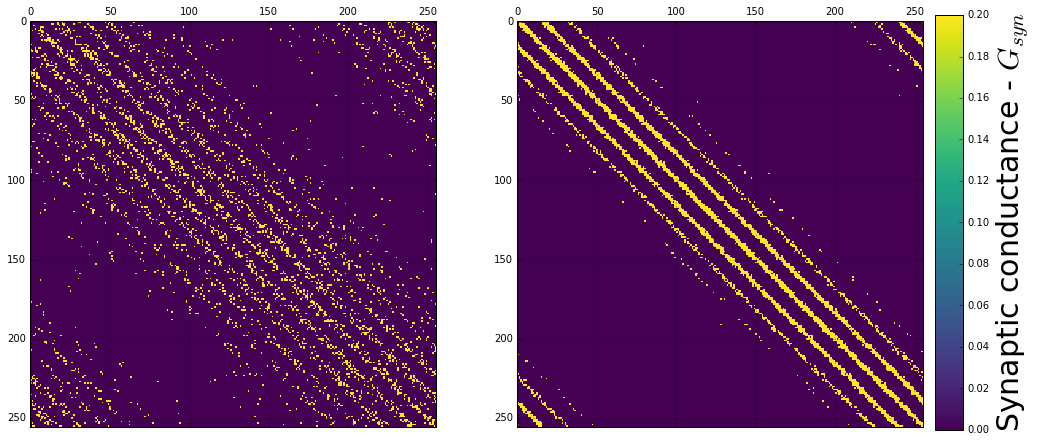

In [25]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(16,8))
ax1.matshow(init_ff_w.reshape(16**2,16**2), vmin=0, vmax=.2)
ax1.grid(visible=True)
# ax1.set_title("Feedforward connections", fontsize=20)
# ax1.tick_params(axis='x', colors='white')
# ax1.tick_params(axis='y', colors='white')
# ax1.set_title('Sharing Y axis')
i = ax2.matshow(init_lat_w.reshape(16**2,16**2), vmin=0, vmax=.2)
ax2.grid(visible=True)
# ax2.set_title("Lateral connections", fontsize=20)
# ax2.tick_params(axis='x', colors='white')
# ax2.tick_params(axis='y', colors='white')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=30)

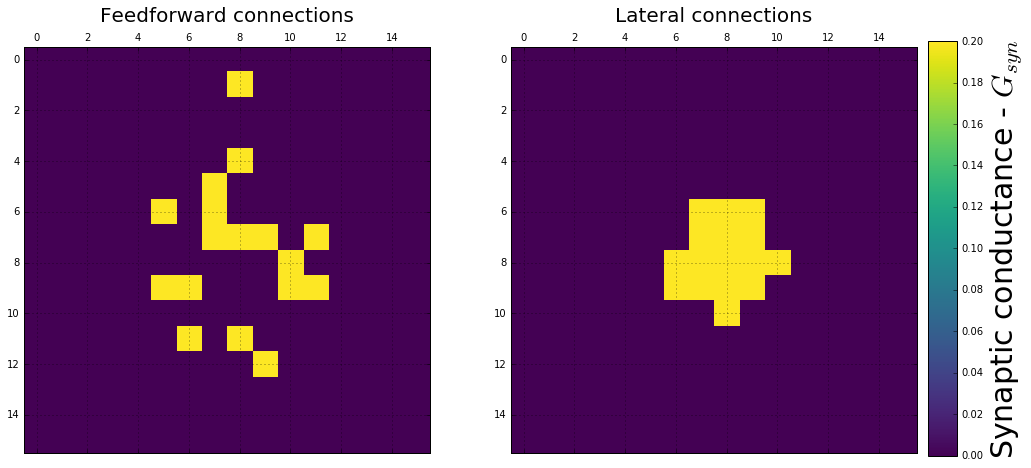

In [26]:
# Two subplots, unpack the axes array immediately
f, (ax1, ax2) = plt.subplots(1, 2 ,figsize=(16,8))
ax1.matshow(np.asarray(init_ff_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
ax1.grid(visible=True)
ax1.set_title("Feedforward connections", fontsize=20)
# ax1.tick_params(axis='x', colors='white')
# ax1.tick_params(axis='y', colors='white')
# ax1.set_title('Sharing Y axis')
i = ax2.matshow(np.asarray(init_lat_w.reshape(16**2,16**2))[136, :].reshape(16,16), vmin=0, vmax=.2)
ax2.grid(visible=True)
ax2.set_title("Lateral connections", fontsize=20)
# ax2.tick_params(axis='x', colors='white')
# ax2.tick_params(axis='y', colors='white')
cbar_ax = f.add_axes([.91, 0.155, 0.025, 0.72])
cbar = f.colorbar(i, cax=cbar_ax)
cbar.set_label("Synaptic conductance - $G_{syn}$", fontsize=30)